# Resolved Vector Velocities

Read in and plot the CEDAR resolved vector velocity “vvels” data product.


In [18]:
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
import h5py
import numpy as np
import matplotlib.gridspec as gridspec
import madrigalWeb.madrigalWeb
import os

In [19]:
madrigalUrl='http://cedar.openmadrigal.org'

data = madrigalWeb.madrigalWeb.MadrigalData(madrigalUrl)

user_fullname = 'Student Example' 
user_email = 'isr.summer.school@gmail.com' 
user_affiliation= 'ISR Summer School 2024'
code = 61   # PFISR
year = 2024
month = 1
day = 8
hour1 = 7 
minute1 = 1
hour2 = 13
# list of experiments inside a time period of a day
expList = data.getExperiments(code,year,month,day,hour1,minute1,0,year,month,day,hour2,0,0)
for exp in expList:
    print(str(exp))

id: 100278619
realUrl: http://cedar.openmadrigal.org/showExperiment/?experiment_list=100278619
url: http://cedar.openmadrigal.org/madtoc/experiments4/2024/pfa/08jan24a
name: Themis36 - Auroral and convection measurements
siteid: 10
sitename: CEDAR
instcode: 61
instname: Poker Flat IS Radar
startyear: 2024
startmonth: 1
startday: 8
starthour: 7
startmin: 1
startsec: 4
endyear: 2024
endmonth: 1
endday: 8
endhour: 18
endmin: 0
endsec: 0
isLocal: True
madrigalUrl: http://cedar.openmadrigal.org/
PI: Asti Bhatt
PIEmail: asti.bhatt@sri.com
uttimestamp: 1709109883
access: 2
Madrigal version: 3.2



In [20]:
fileList = data.getExperimentFiles(expList[0].id)
for file0 in fileList:
    print(os.path.basename(file0.name),'\t', file0.kindat, '\t',file0.kindatdesc)

pfa20240108.001_ac_nenotr_01min.001.h5 	 1000201 	 Ne From Power - Alternating Code (E-region) - 1 min
pfa20240108.001_ac_fit_01min.001.h5 	 2000201 	 Fitted - Alternating Code (E-region) - 1 min
pfa20240108.001_ac_nenotr_03min.001.h5 	 1000203 	 Ne From Power - Alternating Code (E-region) - 3 min
pfa20240108.001_ac_fit_03min.001.h5 	 2000203 	 Fitted - Alternating Code (E-region) - 3 min
pfa20240108.001_ac_nenotr_05min.001.h5 	 1000205 	 Ne From Power - Alternating Code (E-region) - 5 min
pfa20240108.001_ac_fit_05min.001.h5 	 2000205 	 Fitted - Alternating Code (E-region) - 5 min
pfa20240108.001_ac_nenotr_10min.001.h5 	 1000210 	 Ne From Power - Alternating Code (E-region) - 10 min
pfa20240108.001_ac_fit_10min.001.h5 	 2000210 	 Fitted - Alternating Code (E-region) - 10 min
pfa20240108.001_ac_nenotr_15min.001.h5 	 1000215 	 Ne From Power - Alternating Code (E-region) - 15 min
pfa20240108.001_ac_fit_15min.001.h5 	 2000215 	 Fitted - Alternating Code (E-region) - 15 min
pfa20240108.001_

In [21]:
# Download the file that we need to run these examples
os.makedirs('data', exist_ok=True)
vfilepath= 'data/pfa20240108.001_lp_vvels_01min.001.h5'

if not os.path.exists(vfilepath):

    fileList = data.getExperimentFiles(expList[0].id)
    for file0 in fileList:
        if file0.kindatdesc == 'Resolved Velocity - Long Pulse (F-region) - 1 min':
            file2download = file0.name
            break
        
    print('Downloading data file...')

    file = data.downloadFile(file2download, vfilepath, 
                               user_fullname, user_email, user_affiliation,'hdf5')    
    print('...Done!')
else:
    print(f"File {vfilepath} already downloaded")

...Done!


## Line-of-Sight Velocity [ms<sup>-1</sup>]

The velocity array is in the 2D Parameters: 
- VIPN: perp north
- VIPE: perp east
- VI6: antiparallel

**Dimensons:** Nlatitude X Nrecords 

In [25]:
with h5py.File(vfilepath, 'r') as v:
    times=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['Data']['Array Layout']['timestamps']]
    cgm_lat=np.array(v['Data']['Array Layout']['cgm_lat'])

    vipn = np.array(v['Data']['Array Layout']['2D Parameters']['vipn'])
    dvipn = np.array(v['Data']['Array Layout']['2D Parameters']['dvipn'])
    vipe = np.array(v['Data']['Array Layout']['2D Parameters']['vipe'])
    dvipe = np.array(v['Data']['Array Layout']['2D Parameters']['dvipe'])
    vi6 = np.array(v['Data']['Array Layout']['2D Parameters']['vi6'])
    dvi6 = np.array(v['Data']['Array Layout']['2D Parameters']['dvi6'])

## Resolved Vector Velocity Data

Text(0.5, 0, 'Universal Time')

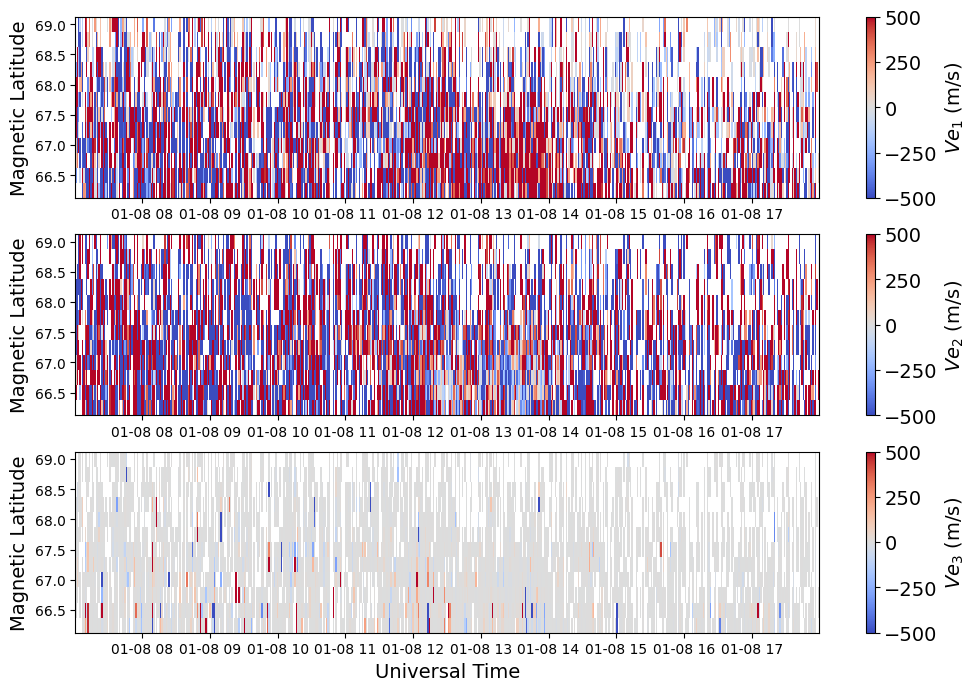

In [26]:
with h5py.File(vfilepath, 'r') as v:

    utime= np.array([datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['Data']['Array Layout']['timestamps']])
    mlat= np.array(v['Data']['Array Layout']['cgm_lat'])
    vipn = np.array(v['Data']['Array Layout']['2D Parameters']['vipn'])
    vipe = np.array(v['Data']['Array Layout']['2D Parameters']['vipe'])
    vi6 = np.array(v['Data']['Array Layout']['2D Parameters']['vi6'])
    #print(np.array(v['Data']['Array Layout']['2D Parameters']['Data Parameters']))
    
    vel = np.array([vipe,vipn,vi6]).T

time = utime.astype('datetime64[s]')
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(3,1)
ax = [fig.add_subplot(gs[i]) for i in range(3)]
for i in range(3):
    c = ax[i].pcolormesh(time, mlat, vel[:,:,i].T, vmin=-500., vmax=500., cmap='coolwarm')
    ax[i].set_ylabel('Magnetic Latitude', fontsize=14)
    ax[i].tick_params(axis='both', labelsize=10)  # Change tick label size for both axes

    fig.colorbar(c, label=fr'$Ve_{i+1}$ (m/s)')

ax[2].set_xlabel('Universal Time')

## Electric Field

The electric field and velocity in the resolved velocities files are not independent measurements. Both are provided for user convenience. By definition, there is no parallel electric field component

Text(0.5, 0, 'Universal Time')

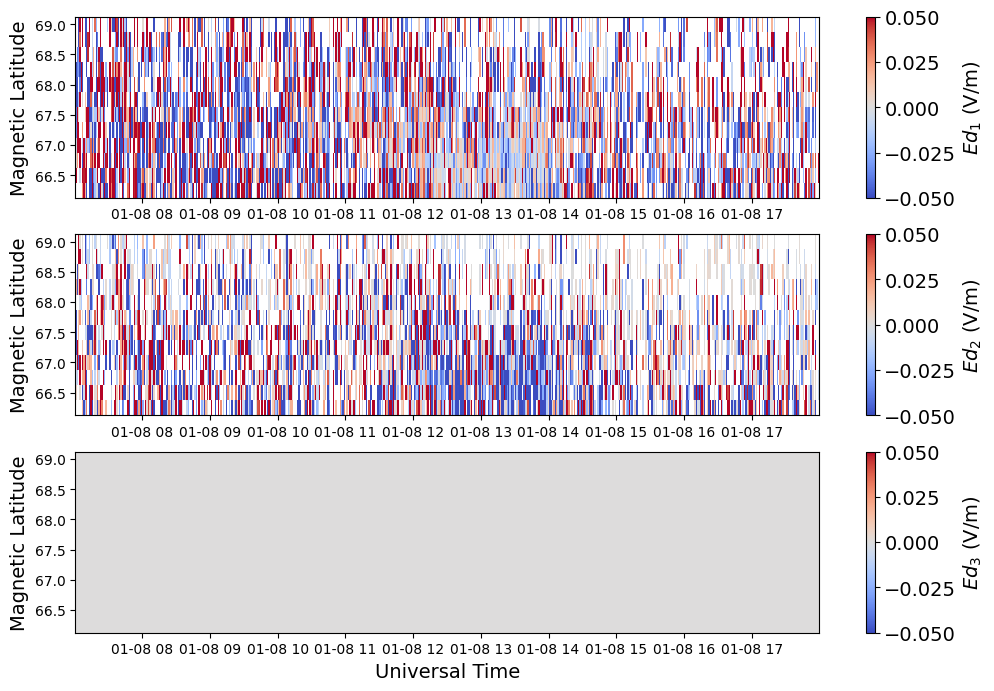

In [27]:
with h5py.File(vfilepath, 'r') as v:
    param = list(v['Data']['Array Layout']['2D Parameters']['Data Parameters'])
    
    utime= np.array([datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['Data']['Array Layout']['timestamps']])
    mlat= np.array(v['Data']['Array Layout']['cgm_lat'])
    epn = np.array(v['Data']['Array Layout']['2D Parameters']['epn'])
    epe = np.array(v['Data']['Array Layout']['2D Parameters']['epe'])
    e3 = np.zeros_like(epe)
    efield = np.array([epe,epn,e3]).T

time = utime.astype('datetime64[s]')
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(3,1)
ax = [fig.add_subplot(gs[i]) for i in range(3)]
for i in range(3):
    c = ax[i].pcolormesh(time, mlat, efield[:,:,i].T, vmin=-0.05, vmax=0.05, cmap='coolwarm')
    ax[i].set_ylabel('Magnetic Latitude')
    ax[i].tick_params(axis='both', labelsize=10)  # Change tick label size for both axes

    fig.colorbar(c, label=fr'$Ed_{i+1}$ (V/m)')

ax[2].set_xlabel('Universal Time')